In [5]:
import matplotlib
import matplotlib.pyplot as plt

# 한글 폰트 설정 (윈도우 기준: 맑은고딕)
matplotlib.rc('font', family='Malgun Gothic')

# 마이너스 기호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False


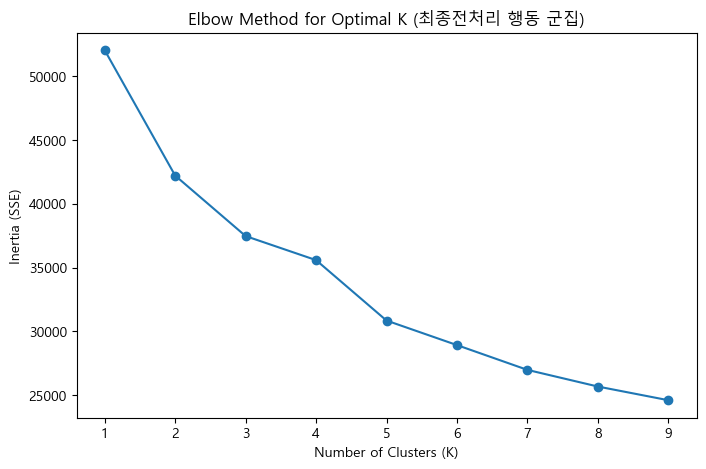

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ 데이터 불러오기 (최종 전처리본)
df = pd.read_csv("p24_fully_mapped.csv", encoding='utf-8-sig')

# 2️⃣ 클러스터링 변수 선정
cluster_vars = [
    '검색능력', '정보판별1(사실확인)', '정보판별2(근거확인)',
    '정보판별3(상업적의도확인)', '정보판별4(정치적의도확인)',
    'SNS피드확인', 'SNS좋아요댓글', 'OTT이용빈도',
    '스마트폰보유', '소득그룹', '연령'  # 여기서 연령은 그룹화 없이 그대로 사용됨 (1~8 코드)
]
df_cluster = df[cluster_vars].dropna()

# 3️⃣ 표준화 (스케일링 → KMeans 필수)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# 4️⃣ Elbow Method (최적 K 확인용)
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K (최종전처리 행동 군집)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (SSE)")
plt.show()



=== K=3 군집별 평균 특성 ===
             검색능력  정보판별1(사실확인)  정보판별2(근거확인)  정보판별3(상업적의도확인)  정보판별4(정치적의도확인)  \
Cluster                                                                       
0        4.585888     3.946805     3.934983        3.938308        3.834134   
1        4.434074     2.540247     2.455802        2.438519        2.358519   
2        3.000000     1.000000     1.000000        1.000000        1.000000   

           SNS피드확인  SNS좋아요댓글   OTT이용빈도  스마트폰보유      소득그룹        연령  
Cluster                                                             
0         6.335796  5.384189  6.980052     1.0  0.875877  4.855560  
1         6.954568  6.127901  7.060247     1.0  0.740247  4.961481  
2        12.000000  4.000000  8.000000     0.0  0.000000  4.000000  


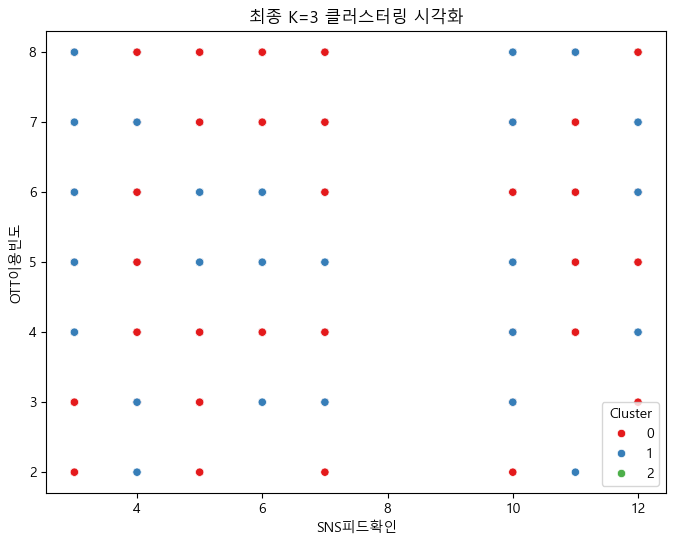

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ 데이터 불러오기 (최종 전처리본)
df = pd.read_csv("p24_fully_mapped.csv", encoding='utf-8-sig')

# 2️⃣ 클러스터링 변수 선정
cluster_vars = [
    '검색능력', '정보판별1(사실확인)', '정보판별2(근거확인)',
    '정보판별3(상업적의도확인)', '정보판별4(정치적의도확인)',
    'SNS피드확인', 'SNS좋아요댓글', 'OTT이용빈도',
    '스마트폰보유', '소득그룹', '연령'  # 그룹화 안함 그대로 사용
]
df_cluster = df[cluster_vars].dropna()

# 3️⃣ 표준화 (스케일링)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# 4️⃣ KMeans 클러스터링 (K=3 확정)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# 5️⃣ 군집별 평균값 확인 (핵심 분석)
cluster_summary = df_cluster.groupby('Cluster').mean()
print("\n=== K=3 군집별 평균 특성 ===")
print(cluster_summary)

# 6️⃣ 간단한 시각화 (예시: SNS피드확인 vs OTT이용빈도)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cluster, x='SNS피드확인', y='OTT이용빈도', hue='Cluster', palette='Set1')
plt.title("최종 K=3 클러스터링 시각화")
plt.show()


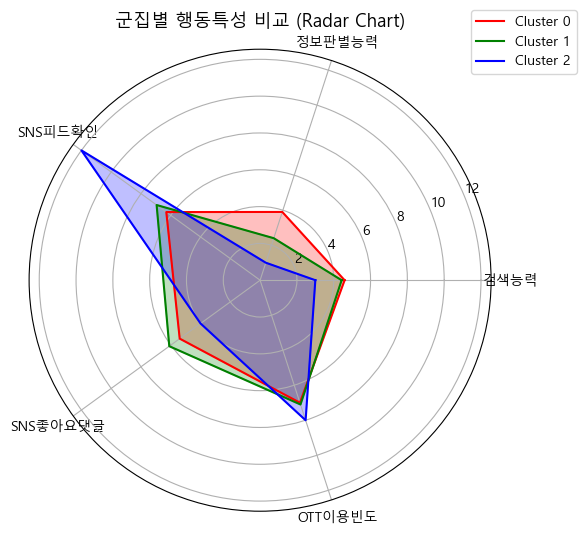

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 군집 요약 데이터 (직접 표에서 입력)
data = {
    'Cluster 0': [4.59, 3.9, 6.3, 5.4, 7.0],
    'Cluster 1': [4.43, 2.4, 6.95, 6.1, 7.1],
    'Cluster 2': [3.00, 1.0, 12.0, 4.0, 8.0]
}

labels = ['검색능력', '정보판별능력', 'SNS피드확인', 'SNS좋아요댓글', 'OTT이용빈도']
df_plot = pd.DataFrame(data, index=labels)

# Radar Chart 준비
categories = list(df_plot.index)
N = len(categories)

angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for cluster, color in zip(df_plot.columns, ['r', 'g', 'b']):
    values = df_plot[cluster].tolist()
    values += values[:1]  # 닫기용
    ax.plot(angles, values, label=cluster, color=color)
    ax.fill(angles, values, alpha=0.25, color=color)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.set_title("군집별 행동특성 비교 (Radar Chart)", fontsize=13)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()


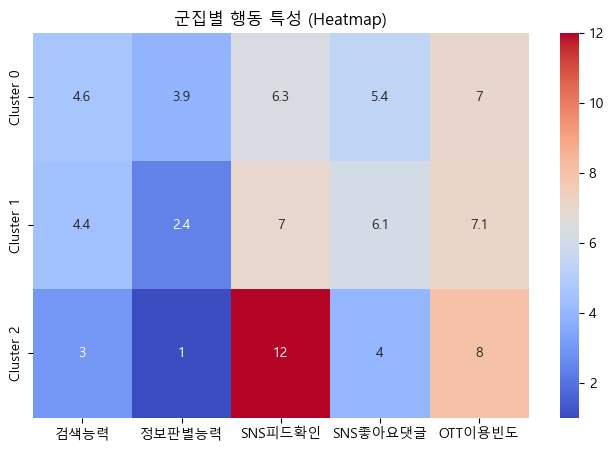

In [10]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(df_plot.T, annot=True, cmap='coolwarm')
plt.title("군집별 행동 특성 (Heatmap)")
plt.show()
